In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import gmaps
import requests
import json
from config import gkey

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
file = "DataForTable2.1.csv"
happiness_years = pd.read_csv(file)
happiness_years.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government
0,Afghanistan,2008,3.723590,7.302574,0.450662,50.500000,0.718114,0.173169,0.881686,0.414297,0.258195,0.612072
1,Afghanistan,2009,4.401778,7.472446,0.552308,50.799999,0.678896,0.195469,0.850035,0.481421,0.237092,0.611545
2,Afghanistan,2010,4.758381,7.579183,0.539075,51.099998,0.600127,0.125859,0.706766,0.516907,0.275324,0.299357
3,Afghanistan,2011,3.831719,7.552006,0.521104,51.400002,0.495901,0.167723,0.731109,0.479835,0.267175,0.307386
4,Afghanistan,2012,3.782938,7.637953,0.520637,51.700001,0.530935,0.241247,0.775620,0.613513,0.267919,0.435440


In [6]:
happiness_years.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government
count,2089.000000,2089.000000,2062.000000,2076.000000,2031.000000,2057.000000,2009.000000,1976.000000,2065.000000,2073.000000,1873.000000
mean,2013.727621,5.473747,9.378408,0.811542,63.180326,0.745462,0.000102,0.746474,0.651421,0.270544,0.483914
std,4.455614,1.115567,1.143520,0.118935,6.948546,0.140751,0.161082,0.186136,0.105954,0.085849,0.191515
min,2005.000000,2.178809,5.526723,0.290184,6.720000,0.257534,-0.335739,0.035198,0.178886,0.082737,0.068769
25%,2010.000000,4.651972,8.473547,0.747664,58.965000,0.651689,-0.113172,0.689840,0.570057,0.207652,0.334808
50%,2014.000000,5.405246,9.463269,0.834770,64.980003,0.767357,-0.023366,0.801339,0.662837,0.260328,0.467046
75%,2017.000000,6.294282,10.347656,0.904682,68.362499,0.857677,0.090584,0.870789,0.737176,0.321706,0.616302
max,2021.000000,8.018934,11.665803,0.987343,74.349998,0.985178,0.706377,0.983276,0.883586,0.704590,0.993604


In [7]:
happiness_years.loc[happiness_years["Generosity"] == 0]

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government


In [8]:
# keep needed series
happiness_2021 = happiness_years.loc[happiness_years['year']==happiness_years['year'].max(),
                                   ["Country name","Life Ladder","Log GDP per capita","Social support",
                                   "Healthy life expectancy at birth","Freedom to make life choices"]]
happiness_2021["Country name"].nunique()

119

In [9]:
# HOW TO HANDLE NaN VALUES - remove null values for any of the 4 colums we're looking at

#set NaN values to 0 - none of the colums have a legitimate value of 0
#happiness_years = happiness_years.fillna(0)
#happiness_years.head()
happiness_2021 = happiness_2021.dropna()
happiness_2021.head()

,Country name,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices
26,Albania,5.255482,9.562287,0.701883,69.150002,0.827453
36,Algeria,5.217018,9.303516,0.840710,66.599998,0.558487
56,Argentina,5.908279,9.955421,0.882305,67.199997,0.819479
71,Armenia,5.300569,9.500485,0.762044,67.650002,0.795170
86,Australia,7.111599,10.818342,0.919755,71.050003,0.912402


In [10]:
happiness_2021 = happiness_2021.rename(columns = {'Log GDP per capita': 'GDP per capita',
                                              'Life Ladder':'Happiness score',
                                             'Healthy life expectancy at birth': 'Healthy life expectancy',
                                                 'Country name':'Country'})
happiness_2021.head()

,Country,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
26,Albania,5.255482,9.562287,0.701883,69.150002,0.827453
36,Algeria,5.217018,9.303516,0.840710,66.599998,0.558487
56,Argentina,5.908279,9.955421,0.882305,67.199997,0.819479
71,Armenia,5.300569,9.500485,0.762044,67.650002,0.795170
86,Australia,7.111599,10.818342,0.919755,71.050003,0.912402


In [11]:
#corr table for reference
corr = happiness_2021.corr()
corr = corr.style.background_gradient(cmap='PRGn')
corr

,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Happiness score,1.000000,0.795247,0.808799,0.711411,0.579028
GDP per capita,0.795247,1.000000,0.767490,0.856166,0.329454
Social support,0.808799,0.767490,1.000000,0.713057,0.429402
Healthy life expectancy,0.711411,0.856166,0.713057,1.000000,0.340498
Freedom to make life choices,0.579028,0.329454,0.429402,0.340498,1.000000


In [12]:
#adding latitude and longitude for each country
gkey = gkey
lat = []
lng = []
for country in happiness_2021["Country"]:
    target_url = f"https://maps.googleapis.com/maps/api/geocode/json?address={country}&components=country:{country}&key={gkey}"
    # components=country:{country} makes sure the country of Georgia is mapped correctly!
    response = requests.get(target_url).json()
    lat.append(response['results'][0]['geometry']['location']['lat'])
    lng.append(response['results'][0]['geometry']['location']['lng'])
happiness_2021['Latitude'] = lat
happiness_2021["Longitude"] = lng

In [13]:
#export to csv
happiness_2021.to_csv('cleaned_happiness_2021.csv', index = False)

In [14]:
# Start of Amanda's code

In [15]:
# re-importing cleaned data so as to not have to rerun above code
happiness_2021 = pd.read_csv('cleaned_happiness_2021.csv')
happiness_2021.describe()

,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Latitude,Longitude
count,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000
mean,5.638666,9.561866,0.805196,65.305000,0.790595,23.288044,17.693680
std,1.128916,1.037003,0.124863,5.458450,0.107183,26.217774,57.722176
min,2.178809,7.108412,0.435524,51.299999,0.422697,-40.900557,-106.346771
25%,4.913588,8.896770,0.713824,61.862499,0.724480,8.075034,-3.934430
50%,5.734929,9.575068,0.844487,66.450001,0.809086,28.214371,19.324220
75%,6.442878,10.431378,0.905608,69.299999,0.869746,44.829130,41.994217
max,7.794378,11.545033,0.979858,74.349998,0.965093,64.963051,174.885971


### Social Support
Per the World Happiness Report: 
>Social support (or having someone to count on in times of trouble) is the national average of the binary responses (either 0 or 1) to the GWP question “If you were in trouble, do you have relatives or friends you can count on to help you whenever you need them, or not?”


### Null Hypothesis Test
Null hypothesis - the means for happiness of the top, middle, and bottom third of countries based on social support are the same

In [16]:
# sort dataset and see how many values need to be in each group
h0_test = happiness_2021[["Country","Happiness score","Social support"]]
h0_test = h0_test.sort_values("Social support")
size = h0_test.count() # 110 countries total
# size/3 = 36.666667 - make 2 groups at 37 and one at 36
h0_test.head()

,Country,Happiness score,Social support
6,Benin,4.493431,0.435524
63,Morocco,5.326249,0.504564
55,Lebanon,2.178809,0.506775
46,Ivory Coast,5.055807,0.554225
57,Malawi,3.635283,0.557914


In [17]:
bottom_third = h0_test.iloc[0:37,:]
bottom_third

,Country,Happiness score,Social support
6,Benin,4.493431,0.435524
63,Morocco,5.326249,0.504564
55,Lebanon,2.178809,0.506775
46,Ivory Coast,5.055807,0.554225
57,Malawi,3.635283,0.557914
18,Congo (Brazzaville),4.920531,0.567651
39,India,3.558254,0.569733
58,Mali,4.113096,0.573394
97,Togo,4.036544,0.603400
74,Pakistan,4.486835,0.608396


In [18]:
middle_third = h0_test.iloc[37:74,:]
middle_third

,Country,Happiness score,Social support
65,Myanmar,4.314040,0.779576
24,Ecuador,5.434872,0.785532
17,Colombia,5.289958,0.792831
100,Uganda,4.224534,0.793350
26,El Salvador,6.431447,0.796106
7,Bolivia,5.568624,0.797810
107,Vietnam,5.540250,0.799494
36,Honduras,6.113636,0.805981
66,Namibia,4.491207,0.807801
72,North Macedonia,5.534750,0.808857


In [19]:
top_third = h0_test.iloc[74:110,:]
top_third

,Country,Happiness score,Social support
59,Mauritius,5.949120,0.886510
85,Serbia,6.245267,0.890106
15,Chile,6.435631,0.891461
80,Portugal,6.183014,0.894942
106,Uzbekistan,6.185308,0.895504
48,Japan,6.091325,0.895738
75,Panama,6.552779,0.898621
52,Kyrgyzstan,5.563700,0.904273
50,Kazakhstan,6.259634,0.906053
76,Paraguay,5.575535,0.907542


In [20]:
# concatenate the thirds back together just to triple check there aren't duplicate countries
check_df = pd.concat([top_third,middle_third,bottom_third])
check_df.value_counts()

Country      Happiness score  Social support
Albania      5.255482         0.701883          1
New Zealand  7.136701         0.949832          1
Portugal     6.183014         0.894942          1
Poland       5.978069         0.935535          1
Philippines  5.965058         0.778192          1
                                               ..
Ghana        4.377951         0.632730          1
Germany      6.754524         0.867583          1
Georgia      4.911273         0.670689          1
Gabon        5.075422         0.753872          1
Zimbabwe     3.154578         0.685151          1
Length: 110, dtype: int64

In [21]:
# get only the happiness score for each group and double check the count is correct
top_happiness = top_third["Happiness score"]
middle_happiness = middle_third["Happiness score"]
bottom_happiness = bottom_third["Happiness score"]
total = top_happiness.count() + middle_happiness.count() + bottom_happiness.count()
print(total)

110


In [22]:
# run ANOVA test!
st.f_oneway(top_happiness,middle_happiness,bottom_happiness)

F_onewayResult(statistic=81.59422930551752, pvalue=3.0050980152485063e-22)

In [23]:
bottom_third['Social support'].std()

0.0836019454461819

In [24]:
middle_third['Social support'].std()

0.0327845657402368

In [25]:
top_third['Social support'].std()

0.023656948674724176

In [26]:
# Run Kruskal test as standard deviations might be different
st.kruskal(top_happiness,middle_happiness,bottom_happiness)

KruskalResult(statistic=69.45942035401498, pvalue=8.261872947301994e-16)

### Result
The pvalue is either 3.0050980152485063e-22 or 8.261872947301994e-16 (depending on test), both of which are quite smaller than 0.05! This rejects the null hypothesis that says the means of all three groups are the same, indicating there is a statistically significant correlation between happiness and social support.

### Other analysis

In [ ]:
plt.hist(happiness_2021['Social support'])
plt.xlabel("Social Support")
plt.title("Distribution of social support scores")
plt.show()

In [ ]:
x_values = happiness_2021['Social support']
y_values = happiness_2021['Happiness score']

In [28]:
quartiles = x_values.quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Q1: {lowerq}\nQ3: {upperq}\nIQR: {iqr}\nLower Bound: {lower_bound}\nUpper Bound: {upper_bound}")

Q1: 0.71382378
Q3: 0.905608341
IQR: 0.19178456099999996
Lower Bound: 0.42614693850000007
Upper Bound: 1.1932851825


In [29]:
outliers = happiness_2021.loc[x_values<lower_bound,:]
outliers
#outliers.sort_values('Social support')

,Country,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Latitude,Longitude


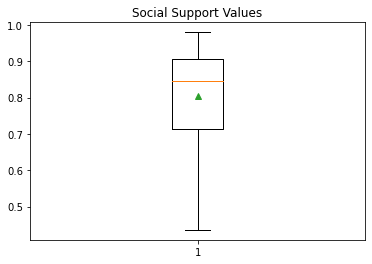

In [30]:
plt.boxplot(x_values, showmeans=True)
plt.title("Social Support Values")
for country in outliers['Country'].values:
    y = outliers.loc[outliers['Country']==country,'Social support']
    plt.annotate(country,(1.05,y),fontsize=10,color="red")
plt.show()

In [31]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

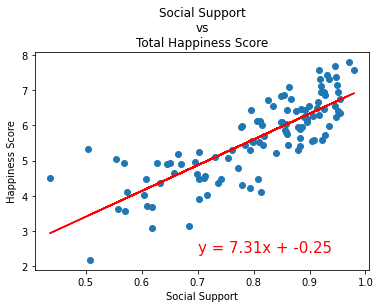

In [32]:
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0.7,2.4),fontsize=15,color="red")
plt.xlabel("Social Support")
plt.ylabel("Happiness Score")
plt.title("Social Support\nvs\nTotal Happiness Score")
plt.show()

In [33]:
pr = round(st.pearsonr(x_values,y_values)[0],2)
print(f'The correlation between social support and happiness is {pr}, suggesting a strong link between the two factors.')

The correlation between social support and happiness is 0.81, suggesting a strong link between the two factors.


In [34]:
bottom_8 = happiness_2021[["Country","Happiness score","Social support"]].sort_values('Social support').head(8)
bottom_8.sort_values(['Happiness score','Social support'])

,Country,Happiness score,Social support
55,Lebanon,2.178809,0.506775
39,India,3.558254,0.569733
57,Malawi,3.635283,0.557914
58,Mali,4.113096,0.573394
6,Benin,4.493431,0.435524
18,Congo (Brazzaville),4.920531,0.567651
46,Ivory Coast,5.055807,0.554225
63,Morocco,5.326249,0.504564


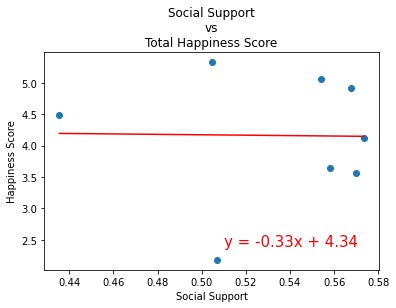

The correlation between social support and happiness for bottom 8 countries is -0.02


In [35]:
x_values = bottom_8['Social support']
y_values = bottom_8['Happiness score']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0.51,2.4),fontsize=15,color="red")
plt.xlabel("Social Support")
plt.ylabel("Happiness Score")
plt.title("Social Support\nvs\nTotal Happiness Score")
plt.show()
pr = round(st.pearsonr(x_values,y_values)[0],2)
print(f'The correlation between social support and happiness for bottom 8 countries is {pr}')

In [36]:
top_ten = happiness_2021.sort_values(['Social support','Happiness score'], ascending = False).head(10)

In [37]:
gmaps.configure(api_key = gkey)
fig = gmaps.figure()

social_sorted = happiness_2021.sort_values('Social support')
top_locations = social_sorted.iloc[74:110,[6,7]]
top_social = social_sorted.iloc[74:110,3]
middle_locations = social_sorted.iloc[37:74,[6,7]]
middle_social = social_sorted.iloc[37:74,3]
bottom_locations = social_sorted.iloc[0:37,[6,7]]
bottom_social = social_sorted.iloc[0:37,3]

all_locations = happiness_2021[["Latitude","Longitude"]]
all_social = happiness_2021['Social support']
                                        
fig = gmaps.figure()

symbols_top = gmaps.symbol_layer(top_locations, fill_color='#028833', stroke_color='#028833')
fig.add_layer(symbols_top)

symbols_middle = gmaps.symbol_layer(middle_locations, fill_color='blue', stroke_color='blue')
fig.add_layer(symbols_middle)

symbols_bottom = gmaps.symbol_layer(bottom_locations, fill_color='#E65300', stroke_color='#E65300')
fig.add_layer(symbols_bottom)

fig


Figure(layout=FigureLayout(height='420px'))

In [ ]:
# End of Amanda's code

In [39]:
# Start John's code

In [40]:
happiness_2021 = pd.read_csv('cleaned_happiness_2021.csv')

In [41]:
happiness_2021.set_index('Country')

,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Latitude,Longitude
Country,,,,,,,
Albania,5.255482,9.562287,0.701883,69.150002,0.827453,41.153332,20.168331
Algeria,5.217018,9.303516,0.840710,66.599998,0.558487,28.033886,1.659626
Argentina,5.908279,9.955421,0.882305,67.199997,0.819479,-38.416097,-63.616672
Armenia,5.300569,9.500485,0.762044,67.650002,0.795170,40.069099,45.038189
Australia,7.111599,10.818342,0.919755,71.050003,0.912402,-25.274398,133.775136
...,...,...,...,...,...,...,...
Uruguay,6.501700,10.010917,0.913873,67.500000,0.898724,-32.522779,-55.765835
Uzbekistan,6.185308,8.941695,0.895504,65.300003,0.927415,41.377491,64.585262
Vietnam,5.540250,9.028702,0.799494,65.500000,0.896800,14.058324,108.277199


### Healthy Life Expectancy
Per the World Happiness Report: 
>Healthy Life Expectancy (HLE). Healthy life expectancies at birth are based
on the data extracted from the World Health Organization’s (WHO) Global
Health Observatory data repository (Last updated: 2020-09-28)

In [42]:
x_values = happiness_2021['Healthy life expectancy']
y_values = happiness_2021['Happiness score']

In [43]:
quartiles = x_values.quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Q1: {lowerq}\nQ3: {upperq}\nIQR: {iqr}\nLower Bound: {lower_bound}\nUpper Bound: {upper_bound}")

Q1: 61.862499235
Q3: 69.299999235
IQR: 7.4375
Lower Bound: 50.706249235
Upper Bound: 80.456249235


In [44]:
outliers = happiness_2021.loc[x_values < lower_bound,:]
outliers
outliers.sort_values('Healthy life expectancy')

,Country,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Latitude,Longitude


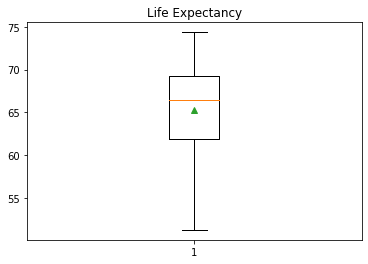

In [45]:
plt.boxplot(x_values, showmeans=True)
plt.title("Life Expectancy")
for country in outliers['Country'].values:
    y = outliers.loc[outliers['Country'] ==country,'Healthy life expectancy']
    plt.annotate(Country, (1.05, y), fontsize=10, color="blue")
plt.show()

### There are no outliers in Healthy life expectancy

In [46]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

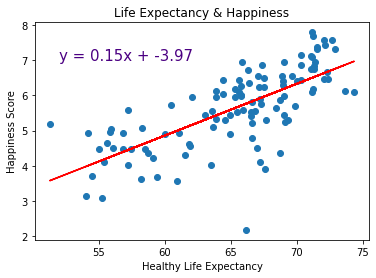

In [47]:
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(52,7),fontsize=15,color="indigo")
plt.xlabel("Healthy Life Expectancy")
plt.ylabel("Happiness Score")
plt.title("Life Expectancy & Happiness")
plt.show()

# Hypothesis:

>When healthy life expectancy is high, there is a measurable increase in the Cantrill happiness score. <br>Null Hypothesis (H<sub>0</sub>):  When healthy life expectancy is high, there is no measurable impact in the Cantrill happiness score whatsoever.<br>If p-value is < 0.05 then we reject the null hypothesis. 

In [48]:
pr = round(st.pearsonr(x_values,y_values)[0],2)
if pr > 0.7 :
    link = "strong"
else :
    link = "not strong"
    
print(f'The correlation between Life Expectancy and Happiness is {pr}, suggesting a {link} link between the two factors.')

The correlation between Life Expectancy and Happiness is 0.71, suggesting a strong link between the two factors.


In [49]:
# Sort Data by Healthy life expectancy
hle_test = happiness_2021[['Country', 'Happiness score', "Healthy life expectancy"]]
hle_test = hle_test.sort_values('Healthy life expectancy')
size = hle_test.count()
#size ## 110 countries in total
#groups will have 22 in each, graded A, B, C, D, & F

In [50]:
F = hle_test.iloc[0: 22, :]
F['Healthy life expectancy'].std()  # Highest Deviation

1.9676788204916722

In [51]:
D = hle_test.iloc[22: 44, :]
D['Healthy life expectancy'].std()  # High Deviation

1.635443791249594

In [52]:
C = hle_test.iloc[44: 66, :]
C['Healthy life expectancy'].std()  # Lowest Deviation

0.5654599620421148

In [53]:
B = hle_test.iloc[66: 88, :]
B['Healthy life expectancy'].std()  # Low Deviation

0.9483868369077247

In [54]:
A = hle_test.iloc[88: 110, :]
A['Healthy life expectancy'].std()  # Low Deviation

0.9424363724186268

In [55]:
st.shapiro(happiness_2021['Healthy life expectancy'])

ShapiroResult(statistic=0.9410234689712524, pvalue=0.00010451104753883556)

### Overall, we reject the H<sub>0</sub> using the Shapiro-Wilk test

In [56]:
st.shapiro(F['Healthy life expectancy'])

ShapiroResult(statistic=0.961149275302887, pvalue=0.5128583908081055)

In [57]:
st.shapiro(D['Healthy life expectancy'])

ShapiroResult(statistic=0.9270840883255005, pvalue=0.1066826581954956)

In [58]:
st.shapiro(C['Healthy life expectancy'])

ShapiroResult(statistic=0.9260108470916748, pvalue=0.10133292526006699)

In [59]:
st.shapiro(B['Healthy life expectancy'])

ShapiroResult(statistic=0.9206434488296509, pvalue=0.07838799804449081)

In [60]:
st.shapiro(A['Healthy life expectancy'])

ShapiroResult(statistic=0.8887973427772522, pvalue=0.017857756465673447)

#### Granularly, we fail to reject the H<sub>0</sub> in subset nations with the 20% lowest healthy life expectancy<br>and as we increase life expectancy, we creep closer to our threshold until we reach the nations<br>with the 20% highest expectancy in which we do reject the null hypothesis even within that subset.

In [61]:
grF = happiness_2021[happiness_2021['Healthy life expectancy'] < 60]["Happiness score"]
grD = happiness_2021[happiness_2021['Healthy life expectancy'].between(59.99, 65.40, inclusive='both')]["Happiness score"]
grC = happiness_2021[happiness_2021['Healthy life expectancy'].between(65.40, 67.20, inclusive='both')]["Happiness score"]
grB = happiness_2021[happiness_2021['Healthy life expectancy'].between(67.20, 70.33, inclusive='both')]["Happiness score"]
grA = happiness_2021[happiness_2021['Healthy life expectancy'] > 70.33]["Happiness score"]

In [62]:
st.f_oneway(grA, grB, grC, grD, grF)

F_onewayResult(statistic=31.559923638910274, pvalue=2.9603982004555786e-17)

### Using the ANOVA test, H<sub>0</sub> is rejected.

In [63]:
st.kruskal(grA, grB, grC, grD, grF)

KruskalResult(statistic=64.21255304891667, pvalue=3.7699154417581336e-13)

### Using the Kruskal-Wallis H-test, H<sub>0</sub> is rejected.

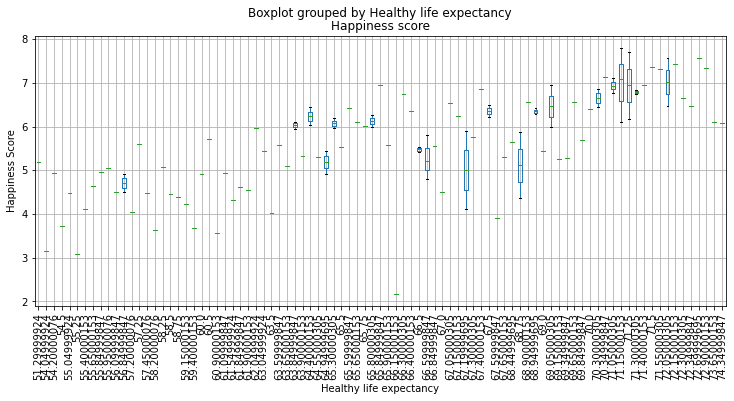

In [64]:
happiness_2021.boxplot('Happiness score', by='Healthy life expectancy', figsize=(12, 5))
plt.ylabel('Happiness Score')
plt.xticks(rotation=90)
plt.show()

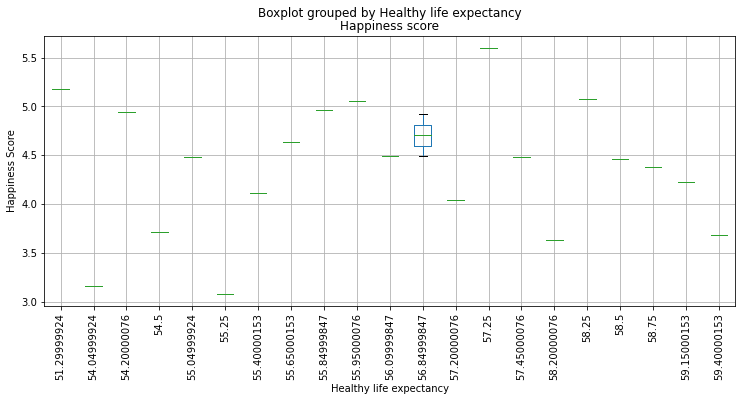

In [65]:
F.boxplot('Happiness score', by='Healthy life expectancy', figsize=(12, 5))
plt.ylabel('Happiness Score')
plt.xticks(rotation=90)
plt.show()

#### Group F - Lowest 22 life expectancy nations<br>Range 51.3 yrs to 59.4 yrs<br>Happiness scores between 3.0 and 5.5

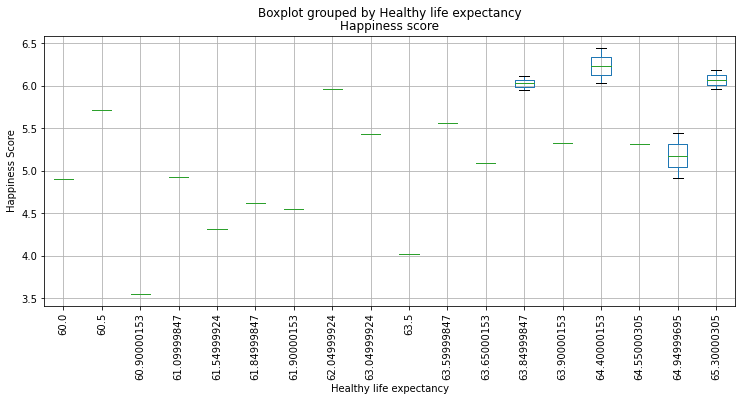

In [66]:
D.boxplot('Happiness score', by='Healthy life expectancy', figsize=(12, 5))
plt.ylabel('Happiness Score')
plt.xticks(rotation=90)
plt.show()

#### Group D - 2nd Lowest 22 life expectancy nations<br>Range 60.0 yrs to 65.3 yrs<br>Happiness scores between 3.5 and 6.5

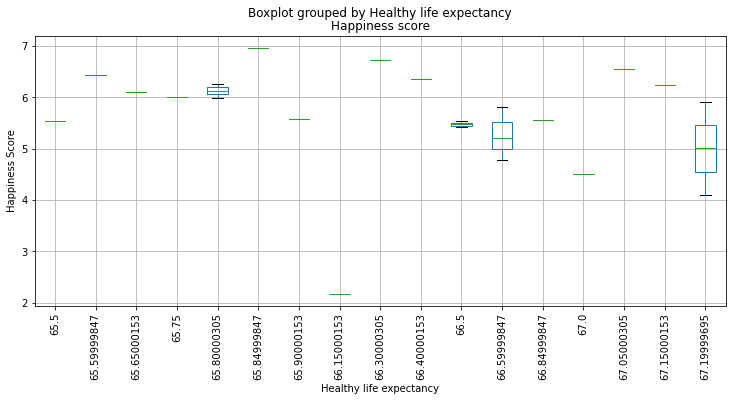

In [67]:
C.boxplot('Happiness score', by='Healthy life expectancy', figsize=(12, 5))
plt.ylabel('Happiness Score')
plt.xticks(rotation=90)
plt.show()

#### Group C - Middle 22 life expectancy nations<br>Range 65.5 yrs to 67.1 yrs<br>Happiness scores between 4.0 and 7.0 with one stray scoring 2.2

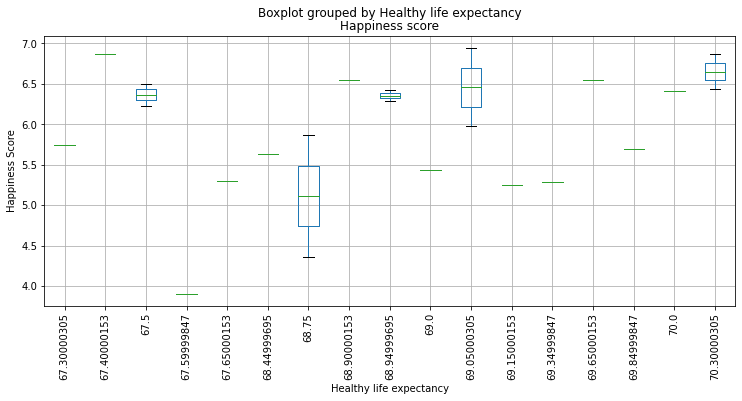

In [68]:
B.boxplot('Happiness score', by='Healthy life expectancy', figsize=(12, 5))
plt.ylabel('Happiness Score')
plt.xticks(rotation=90)
plt.show()

#### Group B - 2nd Highest 22 life expectancy nations<br>Range 67.3 yrs to 70.3 yrs<br>Happiness scores between 4.0 and 7.0

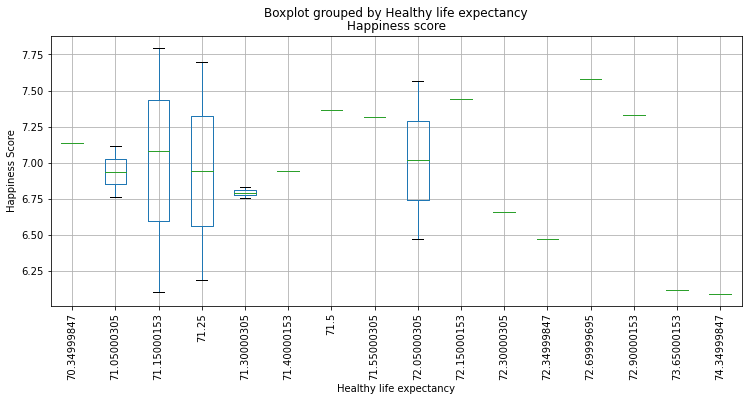

In [69]:
A.boxplot('Happiness score', by='Healthy life expectancy', figsize=(12, 5))
plt.ylabel('Happiness Score')
plt.xticks(rotation=90)
plt.show()

#### Group A - Highest 22 life expectancy nations<br>Range 70.3 yrs to 74.3 yrs<br>Happiness scores between 6.0 and 8.0

In [85]:
gmaps.configure(api_key = gkey)
fig = gmaps.figure()

longevity_df = happiness_2021.sort_values('Freedom to make life choices')
healthy_locations = social_sorted.iloc[74:110,[6,7]]
long_lives = social_sorted.iloc[74:110,3]
medium_locations = social_sorted.iloc[37:74,[6,7]]
medium_lives = social_sorted.iloc[37:74,3]
unhealthy_locations = social_sorted.iloc[0:37,[6,7]]
short_lives = social_sorted.iloc[0:37,3]

all_locations = happiness_2021[["Latitude","Longitude"]]
all_lives = happiness_2021['Freedom to make life choices']
                                        
fig = gmaps.figure()

sym_healthy = gmaps.symbol_layer(healthy_locations, fill_color='#028833', stroke_color='#028833')
fig.add_layer(sym_healthy)

sym_medium = gmaps.symbol_layer(medium_locations, fill_color='blue', stroke_color='blue')
fig.add_layer(sym_medium)

sym_unhealthy = gmaps.symbol_layer(unhealthy_locations, fill_color='#E65300', stroke_color='#E65300')
fig.add_layer(sym_unhealthy)

fig

Figure(layout=FigureLayout(height='420px'))

In [ ]:
# End John's code

In [ ]:
# Start Nathan's code

Before beginning any analysis, it's important to note that with GDP data, we dropped countries in the original data file that have "na" values in GDP per capita, all of these countries have "na" because the GDP per capita may be in some way hard to determine, therefore what remains should be truthful values that can all be used in analysis. For this reason, to look for outliers would be redundant, because it has effectively been done for us.

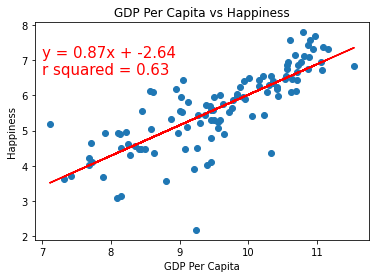

In [70]:
x_axis = happiness_2021["GDP per capita"]
y_axis = happiness_2021["Happiness score"]


(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
rsquared = f"r squared = {round(rvalue * rvalue, 2)}"

plt.plot(x_axis, regress_values, color='red')
plt.annotate(line_eq, (7,7.1), fontsize=15, color="red")
plt.annotate(rsquared, (7,6.6), fontsize=15, color="red")

plt.title("GDP Per Capita vs Happiness")
plt.ylabel("Happiness")
plt.xlabel("GDP Per Capita")

plt.scatter(x_axis, y_axis)
plt.show()

This is a simple scatterplot of the data, along with a linear regression, showing a general trend where higher GDP Per Capita leads to a higher happiness score.

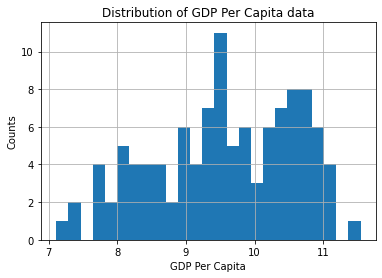

In [71]:
happiness_2021["GDP per capita"].hist(bins=25)

plt.xlabel("GDP Per Capita")
plt.ylabel("Counts")
plt.title("Distribution of GDP Per Capita data")

plt.show()

This plot uses bins of the GDP data to visualize where the GDP is clustered. We can use this to approximate higher, lower, and middle thirds of the data.

In [72]:
# Extract individual groups
group0 = happiness_2021[happiness_2021["GDP per capita"] < 8.75]["Happiness score"]
group1 = happiness_2021[happiness_2021["GDP per capita"].between(8.75, 10.25, inclusive='both')]["Happiness score"]
group2 = happiness_2021[happiness_2021["GDP per capita"] > 10.25]["Happiness score"]

# Perform the ANOVA
st.f_oneway(group0, group1, group2)

F_onewayResult(statistic=66.84719963035289, pvalue=1.4574777104746294e-19)

With a P value much lower than .05, we can reject the null hypothesis that GDP per capita has no effect on happiness score.

In [ ]:
# End Nathan's code

In [ ]:
# Start Joey's code

# Freedom to Make Life Choices

> Freedom to make life choices is the national average of a binary response (0=no, 1=yes) to the question "Are you satisfied or dissatisfied with your freedom to choice what to do with your life?

In [73]:
happiness_2021

,Country,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Latitude,Longitude
0,Albania,5.255482,9.562287,0.701883,69.150002,0.827453,41.153332,20.168331
1,Algeria,5.217018,9.303516,0.840710,66.599998,0.558487,28.033886,1.659626
2,Argentina,5.908279,9.955421,0.882305,67.199997,0.819479,-38.416097,-63.616672
3,Armenia,5.300569,9.500485,0.762044,67.650002,0.795170,40.069099,45.038189
4,Australia,7.111599,10.818342,0.919755,71.050003,0.912402,-25.274398,133.775136
...,...,...,...,...,...,...,...,...
105,Uruguay,6.501700,10.010917,0.913873,67.500000,0.898724,-32.522779,-55.765835
106,Uzbekistan,6.185308,8.941695,0.895504,65.300003,0.927415,41.377491,64.585262
107,Vietnam,5.540250,9.028702,0.799494,65.500000,0.896800,14.058324,108.277199
108,Zambia,3.082155,8.087629,0.619071,55.250000,0.832574,-13.133897,27.849332


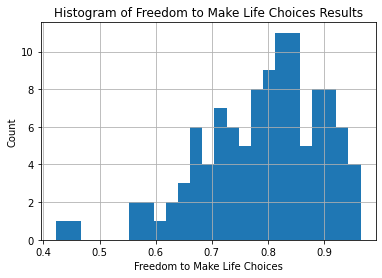

In [74]:
happiness_2021['Freedom to make life choices']. hist(bins=25)

plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Count')
plt.title('Histogram of Freedom to Make Life Choices Results')
plt.show()

In [ ]:
lowest = happiness_2021.loc[happiness_2021['Freedom to make life choices'] > 0.96]
lowest

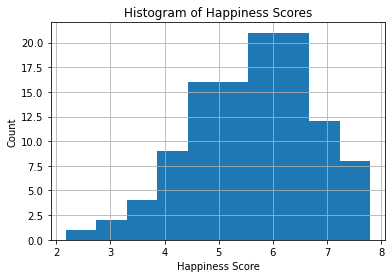

In [ ]:
happiness_2021['Happiness score']. hist(bins=10)

plt.xlabel('Happiness Score')
plt.ylabel('Count')
plt.title('Histogram of Happiness Scores')
plt.show()

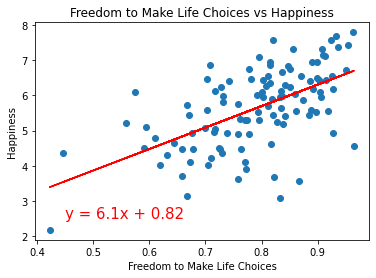

 rvalue = 0.58 
 r-squared = 0.3352737282074053
 Pearsons correlation = (0.5790282620109359, 3.44134129890521e-11)


In [76]:
x_axis = happiness_2021['Freedom to make life choices']
y_axis = happiness_2021['Happiness score']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'

plt.plot(x_axis, regress_values, color='red')
plt.annotate(line_eq, (0.45,2.5), fontsize=15, color='red')

plt.title('Freedom to Make Life Choices vs Happiness')
plt.ylabel('Happiness')
plt.xlabel('Freedom to Make Life Choices')

res = st.linregress(x_axis, y_axis)

plt.scatter(x_axis, y_axis)
plt.show()

pearson_r = st.pearsonr(x_axis, y_axis)

print(f' rvalue = {round(rvalue,2)} ')
print(f' r-squared = {res.rvalue**2}')
print(f' Pearsons correlation = {pearson_r}')

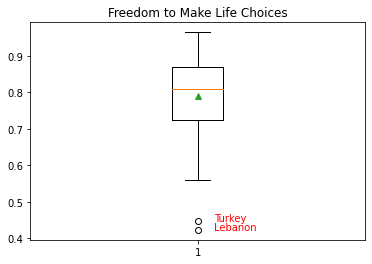

Q1: 0.724479601
Q3: 0.8697462085000001
IQR: 0.1452666075000001
Lower Bound: 0.5065796897499999
Upper Bound: 1.0876461197500003


In [77]:
#define upper and lower bounds
quartiles = x_axis.quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)


#find freedom outliers
outliers = happiness_2021.loc[x_axis<lower_bound,:]
outliers
outliers.sort_values('Freedom to make life choices')

#create boxplot
plt.boxplot(x_axis, showmeans=True)
plt.title("Freedom to Make Life Choices")
for country in outliers['Country'].values:
    y = outliers.loc[outliers['Country']==country,'Freedom to make life choices']
    plt.annotate(country,(1.05,y),fontsize=10,color="red")
plt.show()

print(f"Q1: {lowerq}\nQ3: {upperq}\nIQR: {iqr}\nLower Bound: {lower_bound}\nUpper Bound: {upper_bound}")


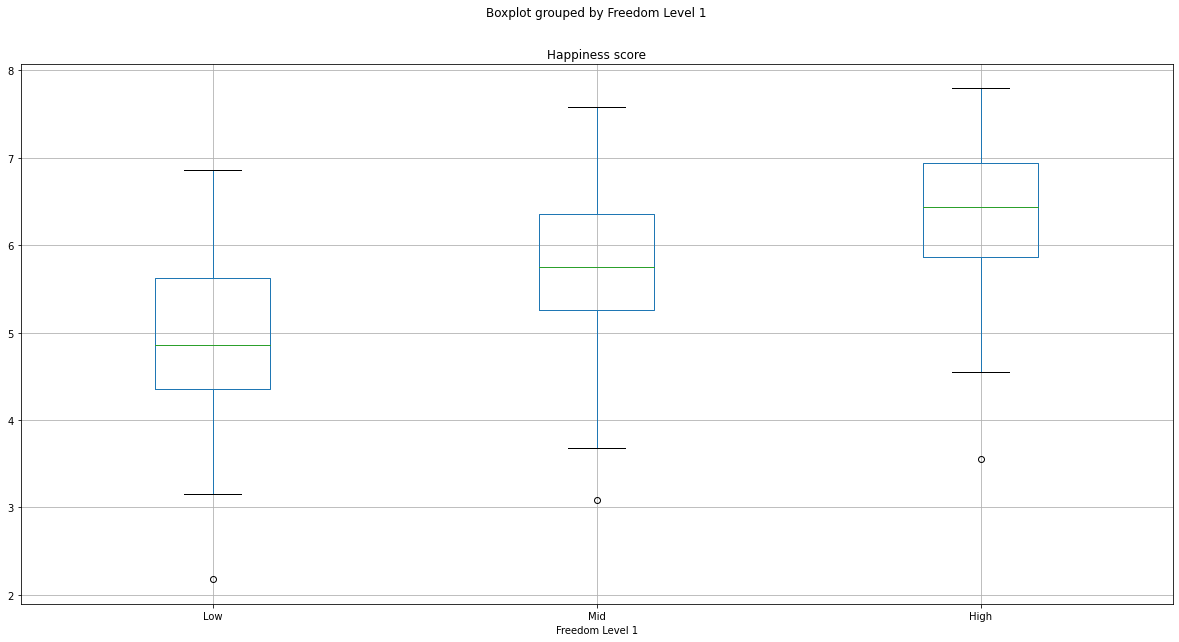

F_onewayResult(statistic=20.730358438619355, pvalue=2.459314123330505e-08)

In [78]:
#sorting by freedom scores and creating three groups
freedom_sort = happiness_2021[['Freedom to make life choices', 'Happiness score']].copy()
freedom_sort = freedom_sort.sort_values(by=['Freedom to make life choices'], ascending=True)
#freedom_sort = freedom_sort.reset_index
freedom_low = freedom_sort.iloc[0:36]
freedom_mid = freedom_sort.iloc[36:73]
freedom_high = freedom_sort.iloc[73:110]

bins = [0, 0.7573, 0.83811, 1]
group_names = ['Low', "Mid", "High"]

freedom_sort["Freedom Level 1"] = pd.cut(freedom_sort["Freedom to make life choices"], bins, labels=group_names, include_lowest=True)
freedom_sort

freedom_sort.boxplot('Happiness score', by='Freedom Level 1', figsize=(20,10))
plt.show()

st.f_oneway(freedom_low['Happiness score'], freedom_mid['Happiness score'], freedom_high['Happiness score'])
#print('There is a statistically significant difference in happiness score between the groups')

<AxesSubplot:>

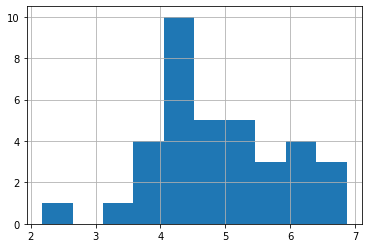

In [79]:
freedom_low['Happiness score'].hist(bins=10)

<AxesSubplot:>

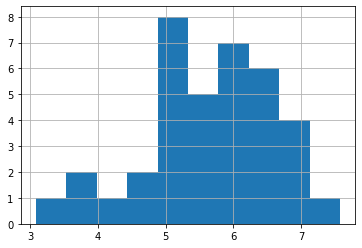

In [80]:
freedom_mid['Happiness score'].hist(bins=10)

<AxesSubplot:>

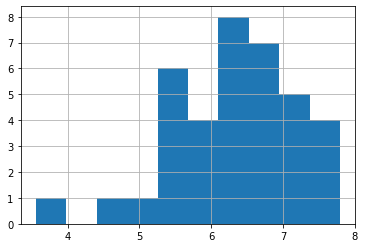

In [81]:
freedom_high['Happiness score'].hist(bins=10)

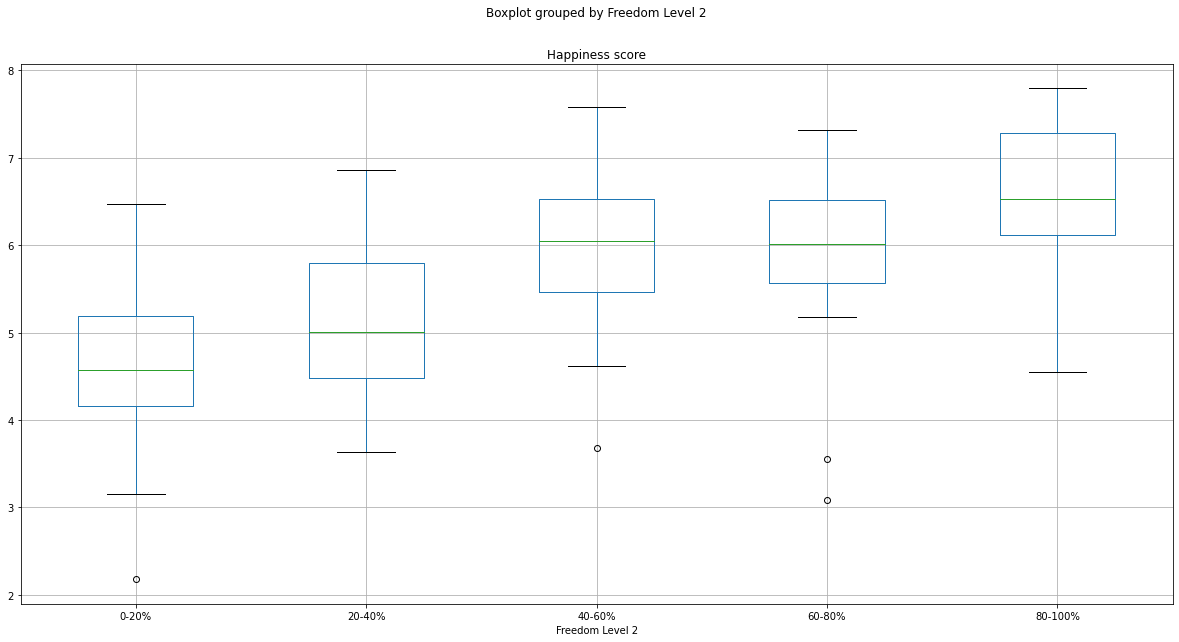

F_onewayResult(statistic=8.467796348343313, pvalue=5.8255273456858264e-06)

In [82]:
#sorting by freedom scores and creating five groups
freedom_sort = happiness_2021[['Freedom to make life choices', 'Happiness score']].copy()
freedom_sort = freedom_sort.sort_values(by=['Freedom to make life choices'], ascending=True)
#freedom_sort = freedom_sort.reset_index
freedom_0_20 = freedom_sort.iloc[0:22]
freedom_20_40 = freedom_sort.iloc[22:44]
freedom_40_60 = freedom_sort.iloc[44:66]
freedom_60_80 = freedom_sort.iloc[66:88]
freedom_80_100 = freedom_sort.iloc[88:110]

#creating bins by 20%
bins = [0, 0.70445, 0.77467, 0.82746, 0.89053, 1]
group_names = ['0-20%', '20-40%', '40-60%', '60-80%', '80-100%']

freedom_sort["Freedom Level 2"] = pd.cut(freedom_sort["Freedom to make life choices"], bins, labels=group_names, include_lowest=True)
freedom_sort

#making box plot
freedom_sort.boxplot('Happiness score', by='Freedom Level 2', figsize=(20,10))
plt.show()

#one way ANOVA test
st.f_oneway(freedom_0_20['Happiness score'], 
            freedom_20_40['Happiness score'], 
            freedom_40_60['Happiness score'], 
            freedom_60_80['Happiness score'],
            freedom_60_80['Happiness score'])

In [ ]:
# End Joey's code